In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import sys
import os
if "../" not in sys.path:
  sys.path.append("../") 
os.chdir("..") 
from envs.data_handler import DataHandler

dh = DataHandler(environment='Saturating')
dh.data.head()

,Optimal_Affected_Component,Optimal_Affected_Component_Uid,Optimal_Failure,raw,cube,sqt,log10,ln,log2
0,Query Service,_SEwwu-cdEeet0YmmfbMwkw,CF1,638.460292,5.558599,13.105330,2.234896,5.146038,7.424164
1,Last Second Sales Item Filter,_SExXrOcdEeet0YmmfbMwkw,CF2,96.674251,4.920383,10.914362,2.075997,4.780159,6.896312
2,Buy Now Item Filter,_SEx_ROcdEeet0YmmfbMwkw,CF5,111.194731,4.920383,10.914362,2.075997,4.780159,6.896312
3,Availability Item Filter,_SEymNucdEeet0YmmfbMwkw,CF5,36.912446,4.594071,9.846831,1.986593,4.574299,6.599319
4,Past Sales Item Filter,_SEx-n-cdEeet0YmmfbMwkw,CF3,96.960084,3.559606,6.715880,1.654206,3.808950,5.495153


# Data Transformation

In [2]:
# Cube Root Transformationn
data_cube = dh.data.apply(lambda x: np.power(x, (1/3)) if x.name == 'cube' else x)
# Square Root Transformation
data_sqt = dh.data.apply(lambda x: np.sqrt(x) if x.name == 'sqt' else x)
# Log10 Transformation
np.seterr(divide = 'ignore')
data_log10 = dh.data.apply(lambda x: np.log10(x) if x.name == 'log10' else x).replace([np.inf, -np.inf], 0)


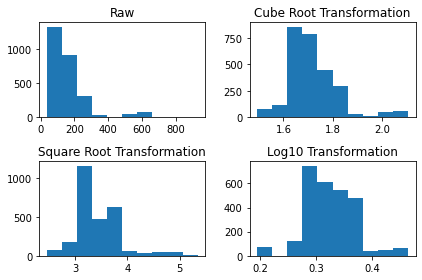

In [3]:
# analyzing historgams
fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.hist(dh.data['raw'])
ax1.title.set_text('Raw')
ax2 = fig.add_subplot(222)
plt.hist(data_cube['cube'])
ax2.title.set_text('Cube Root Transformation')
ax3 = fig.add_subplot(223)
plt.hist(data_sqt['sqt'])
ax3.title.set_text('Square Root Transformation')
ax4 = fig.add_subplot(224)
plt.hist(data_log10['log10'])
ax4.title.set_text('Log10 Transformation')
plt.tight_layout()
plt.show()

# Comparison of the results

## Skewness

([<matplotlib.axis.XTick at 0x126025b80>,
 [Text(0, 0, 'Raw'),
  Text(0, 0, 'Cube Root Transformation'),
  Text(0, 0, 'Square Root Transformation'),
  Text(0, 0, 'Log10 Transformation')])

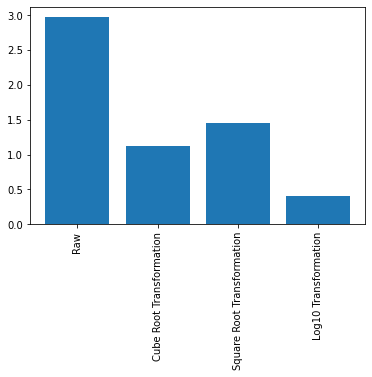

In [4]:
un_skew = dh.data['raw'].skew()
cub_skew = data_cube['cube'].skew()
sqt_skw = data_sqt['sqt'].skew()
log_skw = data_log10['log10'].skew()

labels = ['Raw', 'Cube Root Transformation', 'Square Root Transformation', 'Log10 Transformation']
xticks = range(len(labels))

plt.bar(xticks, [un_skew, cub_skew, sqt_skw, log_skw])
plt.xticks(xticks, labels, rotation='vertical')

## Kurtosis

([<matplotlib.axis.XTick at 0x1261be2b0>,
 [Text(0, 0, 'Raw'),
  Text(0, 0, 'Cube Root Transformation'),
  Text(0, 0, 'Square Root Transformation'),
  Text(0, 0, 'Log10 Transformation')])

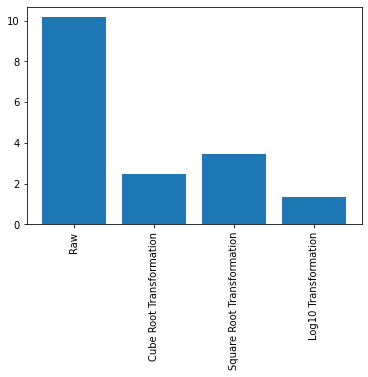

In [5]:
un_krt = dh.data['raw'].kurtosis()
cub_krt = data_cube['cube'].kurtosis()
sqt_krt = data_sqt['sqt'].kurtosis()
log_krt = data_log10['log10'].kurtosis()

labels = ['Raw', 'Cube Root Transformation', 'Square Root Transformation', 'Log10 Transformation']
xticks = range(len(labels))

plt.bar(xticks, [un_krt, cub_krt, sqt_krt, log_krt])
plt.xticks(xticks, labels, rotation='vertical')

# Furhter Analyzing Ideas

In [6]:
# Kullback divergence / distance
#bins = np.arange(0,3.5,0.1)
#hist_untransformed = np.histogram(result_skw['untransformed'].values.tolist(), bins=bins)[0]
#hist_cube = np.histogram(result_skw['cube'].values.tolist(), bins=bins)[0]
#entropy(hist_untransformed, qk=hist_cube)